### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
import pandas as pd
df = pd.read_csv('online_retail_II.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


## Section 1

### Create New Feature: Year

In [ ]:
df = df.assign(Year = pd.DatetimeIndex(df['InvoiceDate']).year)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Filtering Data

In [ ]:
sales = df[(df['Quantity'] >= 1) & (df['Invoice'].str[0] != 'C')].reset_index()
sales

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...,...
1044415,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1044416,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1044417,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1044418,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [ ]:
sales = sales.assign(Revenue = sales['Quantity'] * sales['Price'])
sales

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...,...
1044415,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1044416,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1044417,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1044418,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [ ]:
mean_revenue = sales.groupby('Year')['Revenue'].mean().reset_index()
mean_revenue

,Year,Revenue
0,2009,18.713273
1,2010,19.908987
2,2011,20.058767


<function matplotlib.pyplot.show>

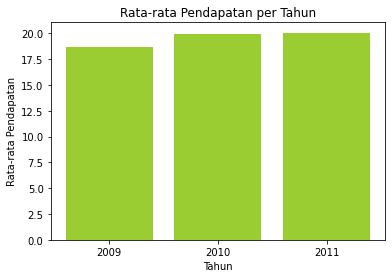

In [ ]:
import matplotlib.pyplot as plt
year = mean_revenue['Year'].astype('str')
plt.bar(year, mean_revenue['Revenue'], color = 'yellowgreen')
plt.title('Rata-rata Pendapatan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Pendapatan')
plt.show

### Interpretation

Berdasarkan hasil yang diperoleh, nilai rata-rata revenue pada pada 3 tahun terakhir terus mengalami peningkatan dari tahun sebelumnya. Dimana nilai rata-rata revenue tertinggi dihasilkan pada tahun 2011, yaitu sebesar 20.06 sterling, kemudian tahun 2010 sebesar 19.91 sterling, dan revenue terendah pada tahun 2009 dengan rata-rata sebesar 18.71 sterling.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [ ]:
finished = sales[sales['Customer ID'].notnull()]
finished

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...,...
1044415,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1044416,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1044417,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1044418,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


#### Customers who canceled their purchases

In [ ]:
cancel = df[df['Invoice'].str[0] == 'C'].reset_index()
cancel

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
1,179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
2,180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
3,181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
4,182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...,...
19489,1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
19490,1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
19491,1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
19492,1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

In [ ]:
number_finished = finished.groupby('Year')['Invoice'].count().reset_index()
number_finished

,Year,Invoice
0,2009,30761
1,2010,403094
2,2011,371765


<function matplotlib.pyplot.show>

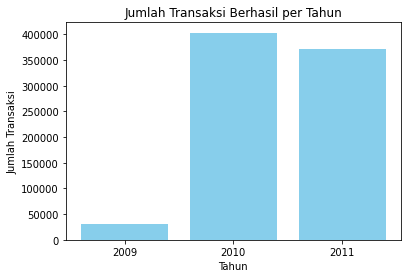

In [ ]:
import matplotlib.pyplot as plt
year = number_finished['Year'].astype('str')
plt.bar(year, number_finished['Invoice'], color = 'skyblue')
plt.title('Jumlah Transaksi Berhasil per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.show

In [ ]:
number_cancel = cancel.groupby('Year')['Invoice'].count().reset_index()
number_cancel

,Year,Invoice
0,2009,1015
1,2010,9919
2,2011,8560


<function matplotlib.pyplot.show>

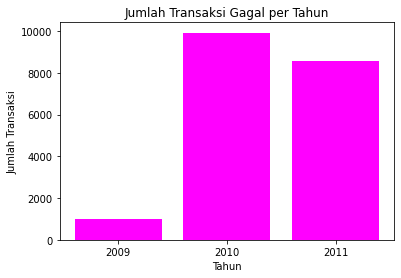

In [ ]:
import matplotlib.pyplot as plt
year = number_cancel['Year'].astype('str')
plt.bar(year, number_cancel['Invoice'], color = 'magenta')
plt.title('Jumlah Transaksi Gagal per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.show

In [ ]:
data = {'Year': number_cancel['Year'], 'Cancel Rate': number_cancel['Invoice'] / sum(number_cancel['Invoice']) * 100}
cancellation_rate = pd.DataFrame(data)
cancellation_rate

,Year,Cancel Rate
0,2009,5.206730
1,2010,50.882323
2,2011,43.910947


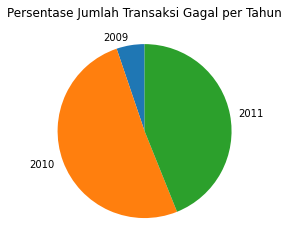

In [ ]:
import matplotlib.pyplot as plt
y = cancellation_rate['Cancel Rate']
label = cancellation_rate['Year']
plt.pie(y, labels = label, startangle = 90)
plt.title('Persentase Jumlah Transaksi Gagal per Tahun')
plt.show()

### Interpretation

Berdasarkan hasil yang diperoleh, dapat diketahui bahwa cancellation_rate berbanding lurus dengan number_cancel, yaitu saat number_cancel meningkat maka cancellation_rate akan menjadi lebih besar. Jumlah transaksi yang dibatalkan tertinggi dalam kurun waktu 3 tahun terjadi pada tahun 2010, dimana terdapat 50.88% pembatalan transaksi dari total pembatalan dalam 3 tahun terakhir. Pada tahun 2011, jumlah transaksi yang dibatalkan sebesar 43.91% dari total pembatalan 3 tahun terakhir. Sedangkan jumlah transaksi yang dibatalkan terendah terjadi pada tahun 2009, dimana hanya menyumbang 5.21% dari total pembatalan dalam 3 tahun terakhir.